# Finding the predictive accuracy of each technical indicator using Logistics Regression

We used logistic regression to determine when one should sell or buy stock based on each indicator. Furthermore, the accuracy of the predicted stock market prices using the indicator is compared against the orginal response, Closing price ("Close" column in dataframe)

In [1]:
import pandas as pd
import numpy as np

In [2]:
%store -r merged_df_4

In [3]:
df = merged_df_4.copy()

In [4]:
df = df.rename(columns={'Price_Movement': 'label'})
df.tail()

,Date,MA,Close,RSI,kc_middle,kc_upper,kc_lower,BB_upperband,BB_lowerband,SMA,left_shoulder,right_shoulder,left_shoulder_diff,right_shoulder_diff,head_shoulders,label
10304,2022-02-17,172.6178,168.880005,46.780097,170.007667,178.210924,161.804409,181.036470,157.983530,169.510000,176.649994,170.539993,0.000000,0.034588,1,0
10305,2022-02-18,172.4622,167.300003,44.462683,169.878730,178.131660,161.625800,180.846092,158.662908,169.754500,176.649994,168.910004,0.000000,0.043815,1,0
10306,2022-02-22,172.2574,164.320007,40.397843,169.614029,178.071668,161.156391,180.624198,159.154803,169.889500,176.649994,169.419998,0.000000,0.040928,1,0
10307,2022-02-23,171.8698,160.070007,35.423888,169.159552,178.051425,160.267678,180.581833,159.226169,169.904001,176.649994,172.639999,0.000000,0.022700,1,0
10308,2022-02-24,171.6098,162.740005,40.389504,168.853859,179.026547,158.681172,180.193545,159.919457,170.056501,176.649994,174.139999,-0.006667,0.007636,1,1


# Logistics Regression

## Keltner Channels

Accuracy: 0.527643064985451


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


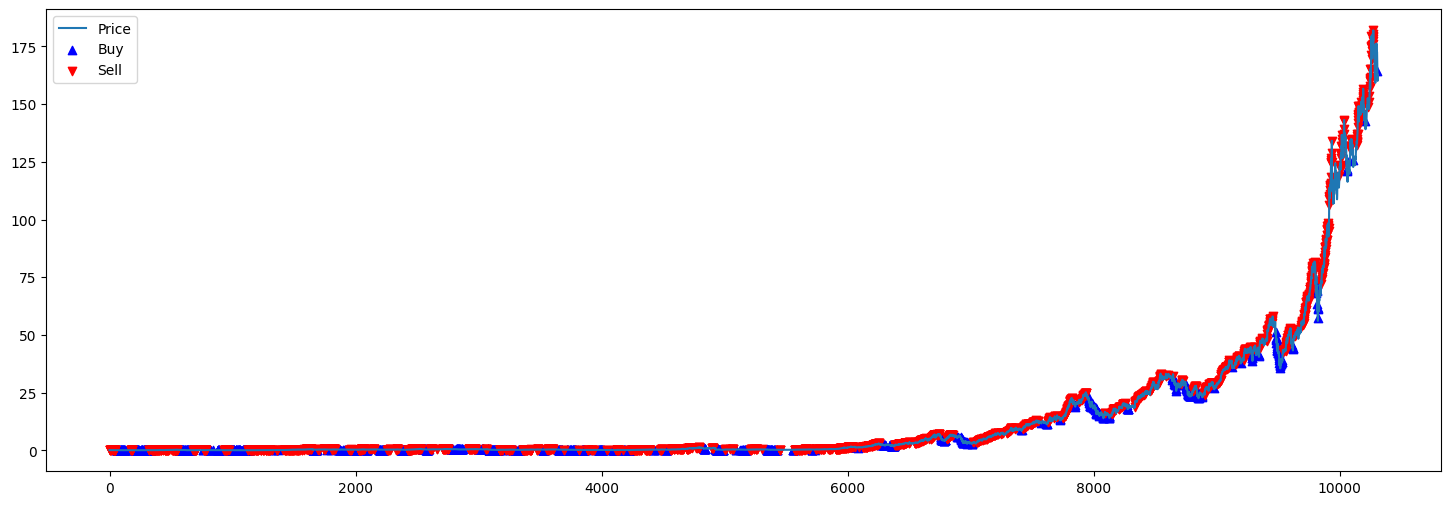

In [5]:
# KELTNER CHANNELS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create the binary labels (1: buy, 0: sell)
kcsignal = np.where(df['Close'].shift(-1) > df['kc_upper'].shift(-1), 0,
                        np.where(df['Close'].shift(-1) < df['kc_lower'].shift(-1), 1, np.nan))

df.tail()
# Split the data into training and testing sets
kc_middle = pd.DataFrame(df['kc_middle'])  
label = pd.DataFrame(df['label']) 

train_index = int(len(df)*0.8)
test_index = len(df) - train_index

# Train Set 
X_train = pd.DataFrame(kc_middle[:train_index])
y_train = pd.DataFrame(label[:train_index])

# Test Set : 200 samples
X_test = pd.DataFrame(kc_middle[train_index:])
y_test = pd.DataFrame(label[train_index:])
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict labels for testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a plot of the Keltner Channels indicator and the buy/sell signals
plt.figure(figsize=(18, 6))
plt.plot(df['Close'], label='Price')
plt.scatter(df[kcsignal == 1].index, df[kcsignal == 1]['Close'], marker='^', color='blue', label='Buy')
plt.scatter(df[kcsignal == 0].index, df[kcsignal == 0]['Close'], marker='v', color='red', label='Sell')
plt.legend()
plt.show()

## Bollinger Bands

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.527643064985451


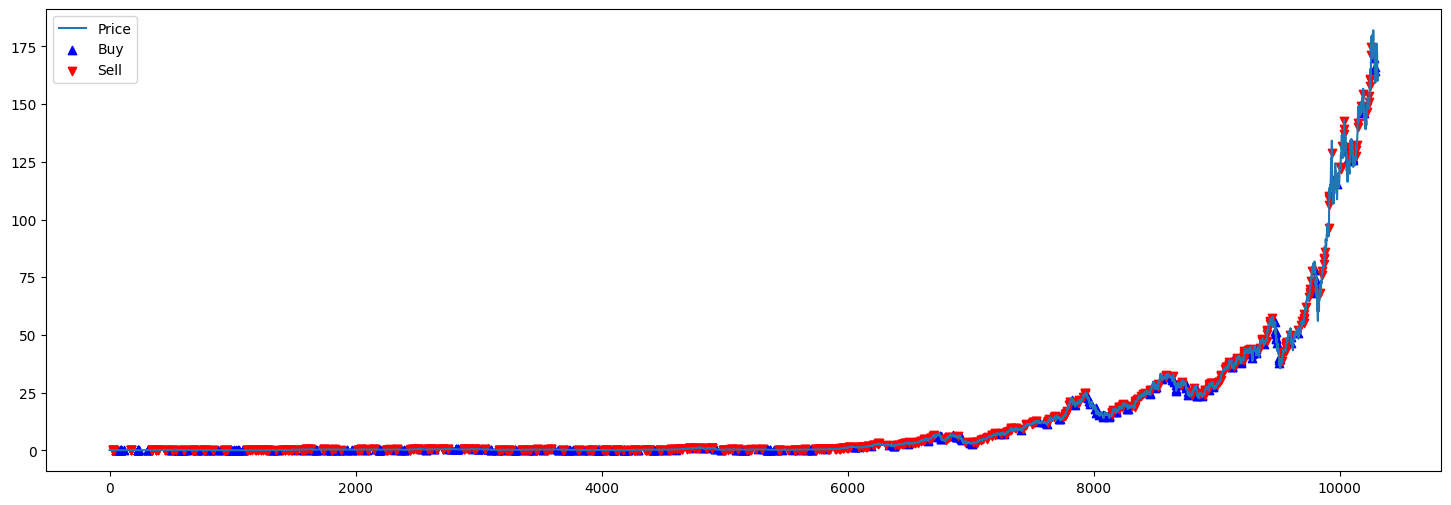

In [6]:
# BOLLINGER BANDS

# Create the binary labels (1: buy, 0: sell)
bbsignal = np.where(df['Close'].shift(-1) > df['BB_upperband'].shift(-1), 0,
                        np.where(df['Close'].shift(-1) < df['BB_lowerband'].shift(-1), 1, np.nan))                       
features = ['BB_upperband', 'BB_lowerband', 'SMA']
df = df.dropna()
bbsignal = bbsignal[:len(df['Close'])] 
# Split the data into training and testing sets

# Split the data into training and testing sets
BB = pd.DataFrame(df[features])  
label = pd.DataFrame(df['label']) 

train_index = int(len(df)*0.8)
test_index = len(df) - train_index

# Train Set 
X_train = pd.DataFrame(BB[:train_index])
y_train = pd.DataFrame(label[:train_index])

# Test Set : 200 samples
X_test = pd.DataFrame(BB[train_index:])
y_test = pd.DataFrame(label[train_index:])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, len(features)), y_train)

# Predict labels for testing set
y_pred = model.predict(X_test.values.reshape(-1, len(features)))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a plot of the Bollinger Bands indicator and the buy/sell signals
plt.figure(figsize=(18, 6))
plt.plot(df['Close'], label='Price')
plt.scatter(df[bbsignal == 1].index, df[bbsignal == 1]['Close'], marker='^', color='blue', label='Buy')
plt.scatter(df[bbsignal == 0].index, df[bbsignal == 0]['Close'], marker='v', color='red', label='Sell')
plt.legend()
plt.show()



## Moving Average

Accuracy: 0.527643064985451


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


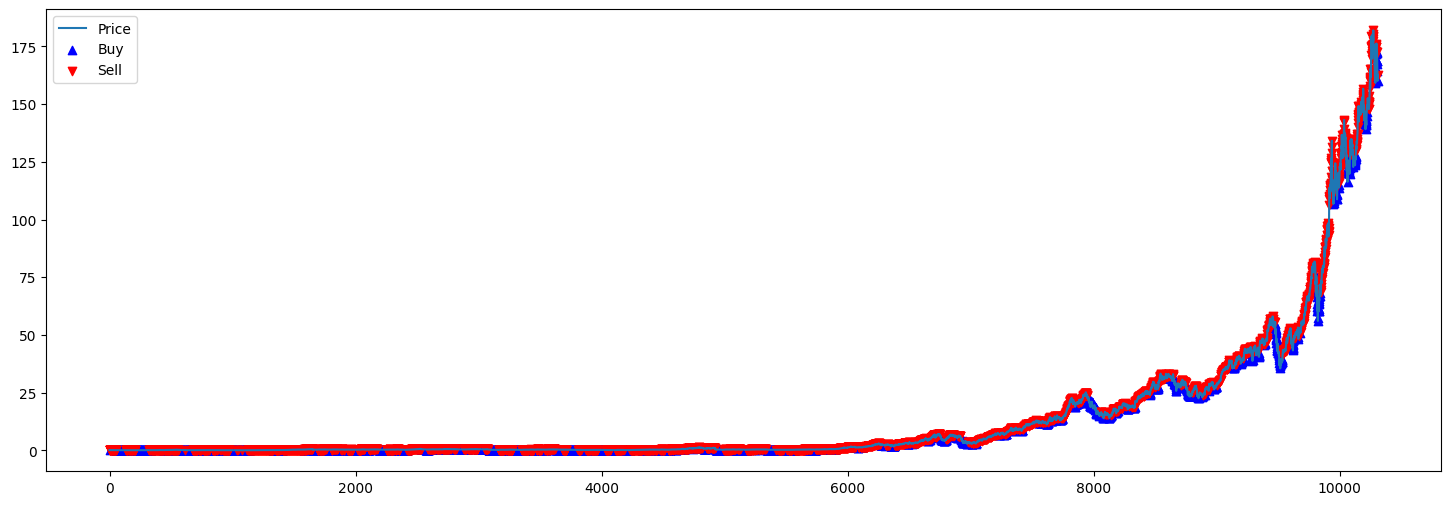

In [7]:
# MOVING AVERAGE

# Create the binary labels (1: buy, 0: sell)
masignal = np.where(df['MA'].shift(-1) > df['Close'], 1, 0)
df = df.dropna()
masignal = masignal[:len(df['Close'])]
# Split the data into training and testing sets

MA = pd.DataFrame(df['MA'])  
label = pd.DataFrame(df['label']) 

train_index = int(len(df)*0.8)
test_index = len(df) - train_index

# Train Set 
X_train = pd.DataFrame(MA[:train_index])
y_train = pd.DataFrame(label[:train_index])

# Test Set : 200 samples
X_test = pd.DataFrame(MA[train_index:])
y_test = pd.DataFrame(label[train_index:])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict labels for testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a plot of the Moving Average indicator and the buy/sell signals
plt.figure(figsize=(18, 6))
plt.plot(df['Close'], label='Price')
plt.scatter(df[masignal == 1].index, df[masignal == 1]['Close'], marker='^', color='blue', label='Buy')
plt.scatter(df[masignal == 0].index, df[masignal == 0]['Close'], marker='v', color='red', label='Sell')
plt.legend()
plt.show()

## Heads and Shoulders

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5906886517943744


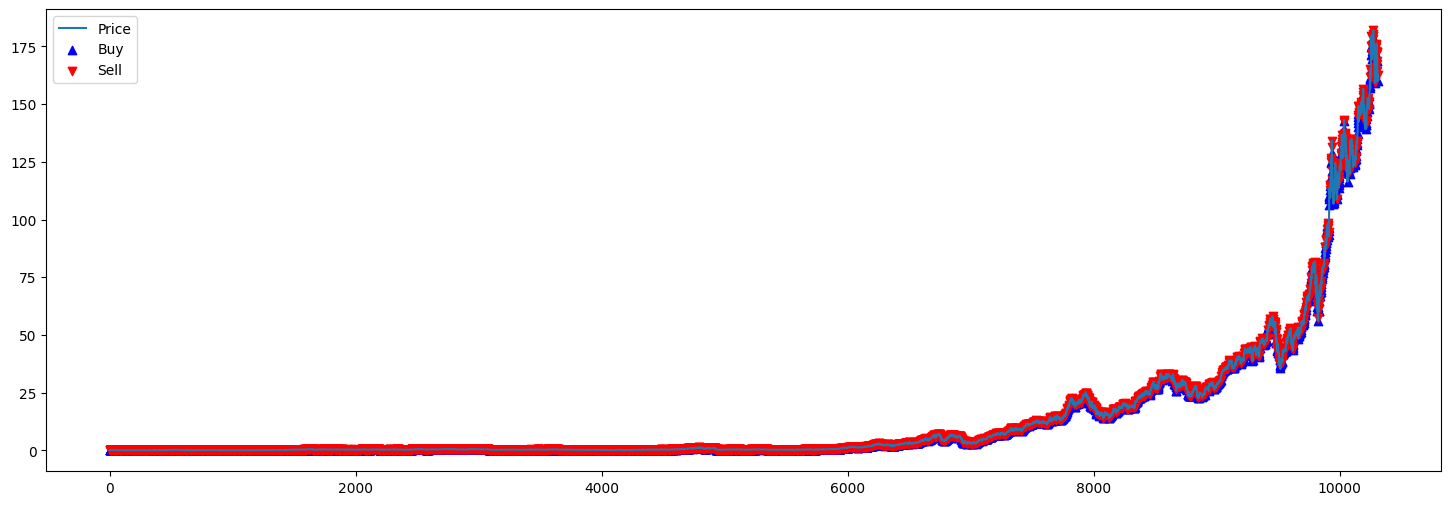

In [14]:
# Heads and Shoulders
# Calculate the neckline (a line connecting the lows of the two shoulders)
df["Neckline"] = (df["left_shoulder"] + df["right_shoulder"]) / 2

# Above neckline you sell, (0), below neckline you buy (1)
hssignal = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
features = ["left_shoulder", "right_shoulder"]
df = df.dropna()
hssignal = hssignal[:len(df['Close'])]
# Split the data into training and testing sets
HnS = pd.DataFrame(df[features])  
label = pd.DataFrame(df['label']) 

train_index = int(len(df)*0.8)
test_index = len(df) - train_index

# Train Set 
X_train = pd.DataFrame(HnS[:train_index])
y_train = pd.DataFrame(label[:train_index])

# Test Set : 200 samples
X_test = pd.DataFrame(HnS[train_index:])
y_test = pd.DataFrame(label[train_index:])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict labels for testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a plot of the Moving Average indicator and the buy/sell signals
plt.figure(figsize=(18, 6))
plt.plot(df['Close'], label='Price')
plt.scatter(df[hssignal == 1].index, df[hssignal == 1]['Close'], marker='^', color='blue', label='Buy')
plt.scatter(df[hssignal == 0].index, df[hssignal == 0]['Close'], marker='v', color='red', label='Sell')
plt.legend()
plt.show()


## Relative Strength Indicator (RSI)

Accuracy: 0.6110572259941804


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


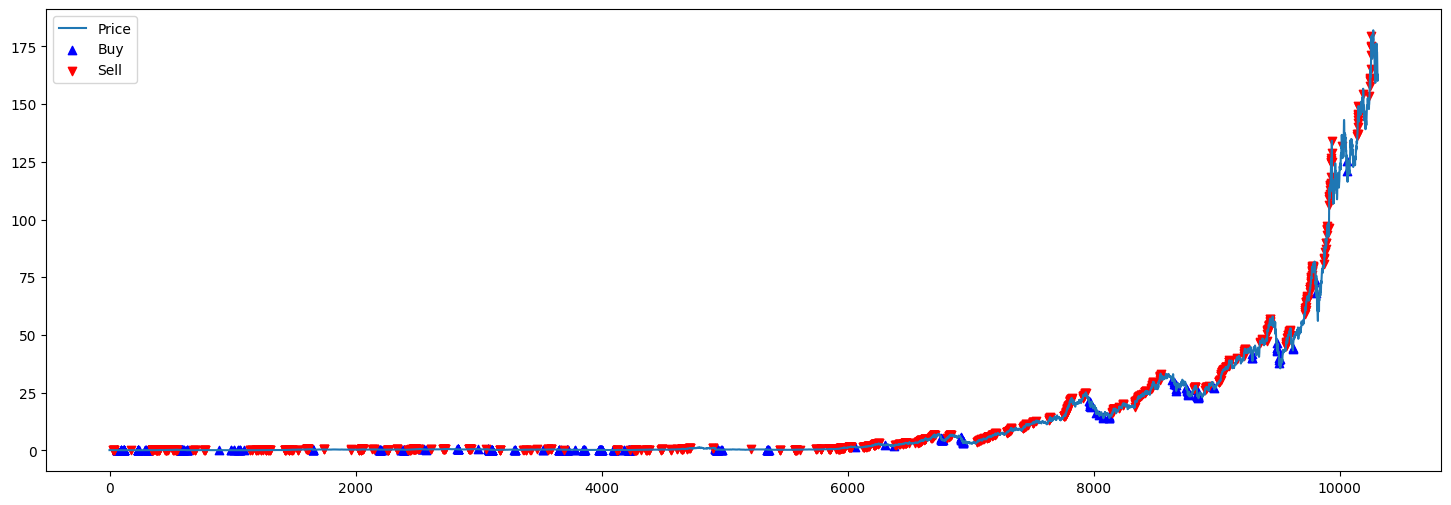

In [12]:
# RSI
# Create the binary labels (1: buy, 0: sell)
rsisignal = np.where(df["RSI"].shift(-1) > 70, 0, np.where(df["RSI"].shift(-1) < 30, 1, -1))

# Split the data into training and testing sets
rsi = pd.DataFrame(df['RSI'])  
label = pd.DataFrame(df['label']) 

train_index = int(len(df)*0.8)
test_index = len(df) - train_index

# Train Set 
X_train = pd.DataFrame(rsi[:train_index])
y_train = pd.DataFrame(label[:train_index])

# Test Set 
X_test = pd.DataFrame(rsi[train_index:])
y_test = pd.DataFrame(label[train_index:])

rsisignal = rsisignal[:len(df['Close'])]

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict labels for testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a plot of the Moving Average indicator and the buy/sell signals
plt.figure(figsize=(18, 6))
plt.plot(df['Close'], label='Price')
plt.scatter(df[rsisignal == 1].index, df[rsisignal == 1]['Close'], marker='^', color='blue', label='Buy')
plt.scatter(df[rsisignal == 0].index, df[rsisignal == 0]['Close'], marker='v', color='red', label='Sell')
plt.legend()
plt.show()